# Train a CNN in Keras

## Libraries

In [16]:
#Data manipulation and visualization

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay


#Tensorflow
from tensorflow.keras import backend as K

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

## The mnist data

### Loading

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [4]:
y_train.shape, y_test.shape

((60000,), (10000,))

Have a look at the data graphically.

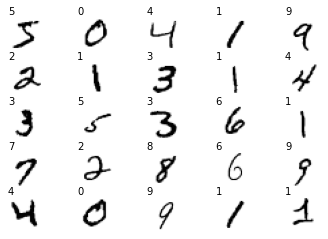

In [19]:
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_train[i], cmap = 'Greys')
    plt.axis('off')
    plt.text(0, 0, y_train[i]) # displays y-values in each subplot

Check the target values.

In [20]:
y_train[0]

5

### Reshaping the X and y

Add a 4th dimension to X.

In [5]:
X_train_rs = np.expand_dims(X_train, axis = 3)

In [6]:
X_test_rs = np.expand_dims(X_test, axis = 3)

In [7]:
X_train_rs.shape, X_test_rs.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

One-hot encoding to y.

In [8]:
y_train_ohe = to_categorical(y_train)

In [9]:
y_test_ohe = to_categorical(y_test)

In [11]:
y_train_ohe

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [12]:
y_test_ohe

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## Make a model

### Clear session

In [21]:
K.clear_session()

### Build the model

In [22]:
model = Sequential([
    Conv2D(filters = 32, 
           kernel_size = (3, 3), 
           strides = (1, 1),
           padding = "valid",
           activation = "relu", 
           input_shape = (28, 28, 1)),
    
    
    MaxPooling2D(pool_size = (2, 2),
                 strides = (2, 2), 
                 padding = "valid"),
    
    
    Conv2D(filters = 16,
           kernel_size = (3, 3), 
           strides = (1, 1),
           padding = "valid", 
           activation = "relu"),
    
    
    MaxPooling2D(pool_size = (2, 2),
                 strides = (2, 2), 
                 padding = "valid"),
    
    
    Flatten(),
    
    
    Dense(50, activation = "relu"),
    
    
    Dense(10, activation = "softmax")
])

2023-01-06 16:04:10.295203: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-01-06 16:04:10.295456: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-01-06 16:04:10.295470: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (nteni-HP-ENVY-x360-Convertible-15-es0xxx): /proc/driver/nvidia/version does not exist
2023-01-06 16:04:10.296337: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 50)                2

### Compile the model

In [25]:
model.compile(optimizer = "Adam", 
              loss = "categorical_crossentropy", 
              metrics = ["accuracy"])

### Extract callback

In [26]:
callback = EarlyStopping(monitor = "val_loss", patience = 3)

### Fit the model

In [27]:
hist = model.fit(X_train_rs, y_train_ohe,
                 batch_size = 1000, 
                 epochs = 30, 
                 validation_split = 0.2,
                 callbacks= [callback])

Epoch 1/30
48/48 [==============================] - 5s 83ms/step - loss: 4.3720 - accuracy: 0.5405 - val_loss: 0.7263 - val_accuracy: 0.7857
Epoch 2/30
48/48 [==============================] - 4s 81ms/step - loss: 0.5576 - accuracy: 0.8405 - val_loss: 0.3692 - val_accuracy: 0.8972
Epoch 3/30
48/48 [==============================] - 4s 83ms/step - loss: 0.3276 - accuracy: 0.9071 - val_loss: 0.2574 - val_accuracy: 0.9274
Epoch 4/30
48/48 [==============================] - 4s 82ms/step - loss: 0.2369 - accuracy: 0.9317 - val_loss: 0.2046 - val_accuracy: 0.9414
Epoch 5/30
48/48 [==============================] - 4s 83ms/step - loss: 0.1853 - accuracy: 0.9467 - val_loss: 0.1709 - val_accuracy: 0.9514
Epoch 6/30
48/48 [==============================] - 4s 81ms/step - loss: 0.1525 - accuracy: 0.9549 - val_loss: 0.1480 - val_accuracy: 0.9577
Epoch 7/30
48/48 [==============================] - 4s 83ms/step - loss: 0.1285 - accuracy: 0.9619 - val_loss: 0.1316 - val_accuracy: 0.9615
Epoch 8/30
48

### Evaluate the model

In [28]:
model.evaluate(X_test_rs, y_test_ohe, batch_size = 1000)

10/10 [==============================] - 0s 25ms/step - loss: 0.0821 - accuracy: 0.9786


[0.08212538808584213, 0.978600025177002]

## Examine the model

In [29]:
hist.history

{'loss': [4.37199592590332,
  0.557628870010376,
  0.32758989930152893,
  0.23691798746585846,
  0.1852657049894333,
  0.1525253802537918,
  0.12845663726329803,
  0.10936464369297028,
  0.09504447132349014,
  0.08375021815299988,
  0.07273770868778229,
  0.06616675108671188,
  0.059479933232069016,
  0.052478134632110596,
  0.048203032463788986,
  0.042784422636032104,
  0.03906688466668129,
  0.03527899459004402,
  0.03206228092312813,
  0.029250619933009148,
  0.025797391310334206,
  0.023857658728957176,
  0.021558575332164764],
 'accuracy': [0.5405416488647461,
  0.8404791951179504,
  0.9071249961853027,
  0.9317291378974915,
  0.9466875195503235,
  0.9548541903495789,
  0.9619374871253967,
  0.9678333401679993,
  0.9717708230018616,
  0.973562479019165,
  0.9778749942779541,
  0.9794374704360962,
  0.9817291498184204,
  0.984333336353302,
  0.9851250052452087,
  0.987708330154419,
  0.9887083172798157,
  0.9900000095367432,
  0.9907500147819519,
  0.9915624856948853,
  0.99272918

### Accuracy curve

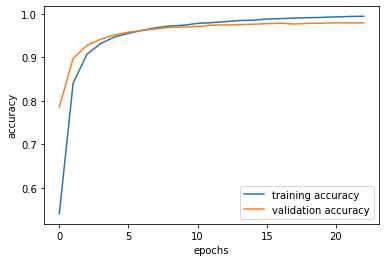

In [32]:
plt.plot(hist.history["accuracy"], label = "training accuracy")
plt.plot(hist.history["val_accuracy"], label = "validation accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()

### Loss

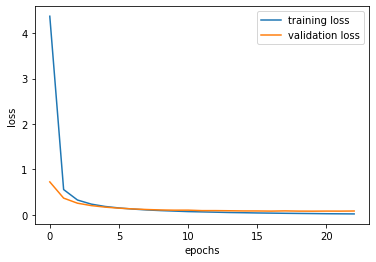

In [33]:
plt.plot(hist.history["loss"], label = "training loss")
plt.plot(hist.history["val_loss"], label = "validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()

## Predict

### Prediction

In [34]:
ypred = model.predict(X_test_rs)

313/313 [==============================] - 1s 2ms/step


In [35]:
ypred[0]

array([1.8107409e-12, 6.0395922e-10, 4.9098819e-10, 1.0031253e-07,
       3.7480389e-13, 7.1000197e-16, 5.8723805e-14, 9.9999982e-01,
       8.9718692e-14, 5.3566156e-09], dtype=float32)

In [36]:
np.argmax(ypred[0])

7

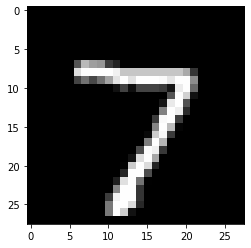

In [38]:
plt.imshow(X_test_rs[0], cmap = 'gray')

### Confusion matrix

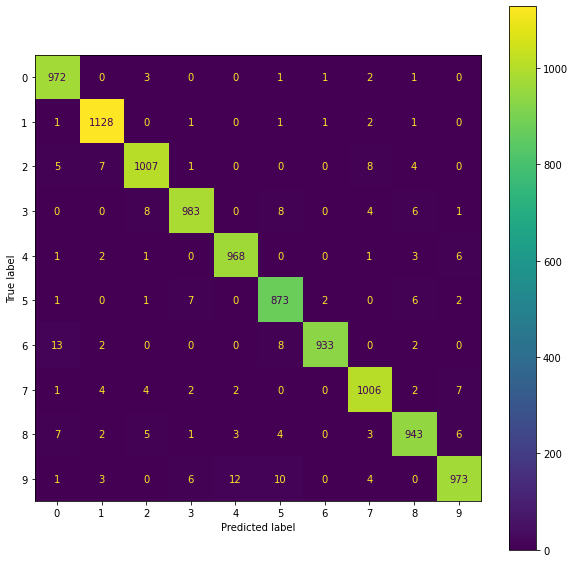

In [40]:
cm = confusion_matrix(y_true = y_test, 
                      y_pred = np.argmax(ypred, axis=1))

disp = ConfusionMatrixDisplay(confusion_matrix = cm,
                             display_labels = np.unique(y_test))

fig, ax = plt.subplots(figsize = (10,10))

disp.plot(ax = ax)
